## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as pl
import seaborn as sns

In [5]:
titanicdf = pd.read_csv("titanic.csv")  


In [6]:
titanicdf.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Determine if the survival rate is associated to the class of passenger:

In [7]:
total = len(titanicdf['Pclass'])
first = (titanicdf['Pclass'] == 1).sum()
second = (titanicdf['Pclass'] == 2).sum()
third = (titanicdf['Pclass'] == 3).sum()

first_class =  first / total * 100
second_class = second / total * 100
third_class = third / total * 100

In [8]:
print("First Class Survival with", first, "passengers has a rate of", round(first_class,2))
print("Second Class Survival rate is", second, "passengers has a rate of", round(second_class,2))
print("Third Class Survival rate is", third, "passengers has a rate of", round(third_class,2))

First Class Survival with 216 passengers has a rate of 24.24
Second Class Survival rate is 184 passengers has a rate of 20.65
Third Class Survival rate is 491 passengers has a rate of 55.11


In [9]:
classpercent = [["First",216, 24.24], ['Second', 184, 20.65], ['Third', 491, 55.11]]
df2 = pd.DataFrame(classpercent, columns = ['Class', 'Total Survive', 'Percentage'])
df2

Class  Total Survive  Percentage
0   First            216       24.24
1  Second            184       20.65
2   Third            491       55.11

In [10]:
survivedclassdf = titanicdf[['Survived', 'Pclass']]        
survivedclassdf.head()

survivepclass = survivedclassdf.groupby(['Pclass']).sum()  
totalclass = survivedclassdf.groupby(['Pclass']).count()  #calculating the survived per class

totalclass.rename(columns = {'Survived':'Total'}, inplace = True) # Changed column name to Total

survivedtotclass = pd.merge(survivepclass, totalclass, left_index=True, right_index=True) # merge by index
survivedtotclass

Survived  Total
Pclass                 
1            136    216
2             87    184
3            119    491

In [14]:
percent_survived = round((survivedtotclass['Survived'] / survivedtotclass['Total']) * 100,2)
survivedtotclass['Percentage'] = percent_survived

survivedtotclass['Survived'].describe()
# the mean value of survived variable per class is 114

count      3.000000
mean     114.000000
std       24.879711
min       87.000000
25%      103.000000
50%      119.000000
75%      127.500000
max      136.000000
Name: Survived, dtype: float64

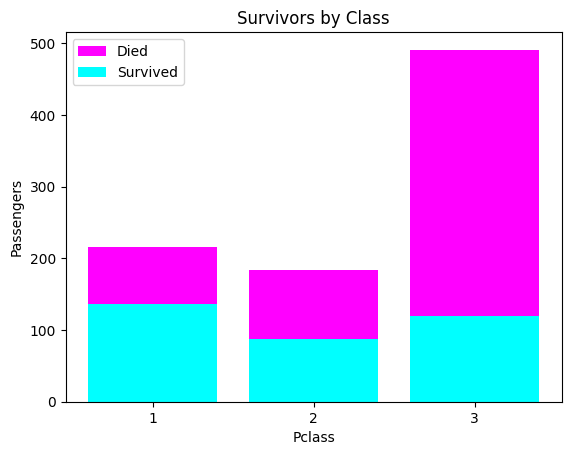

In [14]:
x = survivedtotclass.index.values
ht = survivedtotclass.Total
hs = survivedtotclass.Survived

pht = pl.bar(x, ht, color=['magenta'])
phs = pl.bar(x, hs, color=['cyan'])

pl.xticks(x, x)
pl.xlabel('Pclass')
pl.ylabel('Passengers')
pl.title('Survivors by Class')

pl.legend([pht,phs],['Died', 'Survived'])

# Displaying the graph of Died and Survived per class, we could see that mostly who died are those from the Pclass 3
# and the highest survivoal rate are from Pclass 1.

As seen in the graph and also from the dataframe table - 1st Class passengers had highest rate of survival, followed by the 3rd class passengers, and the least survival rates was of 3rd class passengers. The passengers travelling in 3rd class were 491 which has the highest number yet only 24.24% survived.

###  Determine if the survival rate is associated to the gender"

In [15]:
groupsex = titanicdf.groupby('Sex')

survivedsex = groupsex['Survived'].sum()
survivedsex.name = 'Survived'
display(survivedsex)

totalsex = groupsex['Survived'].size()
totalsex.name = 'Total'
display(totalsex)

survivetotalsex = pd.concat([survivedsex, totalsex], axis=1)
survivetotalsex

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

Survived  Total
Sex                    
female       233    314
male         109    577

In [16]:
percent_survived = (survivetotalsex['Survived'] / survivetotalsex['Total']) * 100
survivetotalsex['Percentage'] = percent_survived

survivetotalsex

Survived  Total  Percentage
Sex                                
female       233    314   74.203822
male         109    577   18.890815

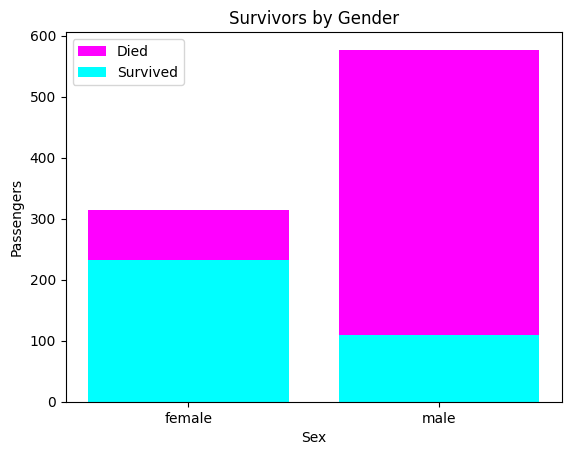

In [17]:
x = range(len(survivetotalsex.index.values))
ht = survivetotalsex.Total
hs = survivetotalsex.Survived

pht = pl.bar(x, ht,color=['magenta'])
phs = pl.bar(x, hs, color=['cyan'])

pl.xticks(x, survivetotalsex.index.values)
pl.xlabel('Sex')
pl.ylabel('Passengers')
pl.title('Survivors by Gender')

pl.legend([pht,phs],['Died', 'Survived'])

### Determine the survival rate is associated to the age

In [18]:
titanicdf['Age'].isnull().sum()
#Out of 891 passengers, there is 177 missing Age values, so the result might be less reliable

177

In [36]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanicdf['AgeGroup'] = titanicdf.Age.apply(age_group)
titanicdf.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGroup  
0      0         A/5 21171   7.2500   NaN        S    20-29  
1      0          PC 17599  71.2833   C85        C    30-39  
2      0  STON/O2. 3101282   7.9250   NaN        S    20-29  
3      0            113803  53.1000  C123        S    30-39  
4      0            373450   8.0500   NaN        S    30-39

In [37]:
agesummary = titanicdf.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
agesummary = agesummary.rename(columns={'sum':'Survived', 'size':'Total'})
agesummary

Survived  Total
AgeGroup                 
0-9             38     62
10-19           41    102
20-29           77    220
30-39           73    167
40-49           34     89
50-59           20     48
60-69            6     19
70-79            0      6
80-89            1      1

In [38]:
percent_survived = (survivetotalsex['Survived'] / survivetotalsex['Total']) * 100
survivetotalsex['Percentage'] = percent_survived

survivetotalsex

Survived  Total  Percentage
Sex                                
female       233    314   74.203822
male         109    577   18.890815

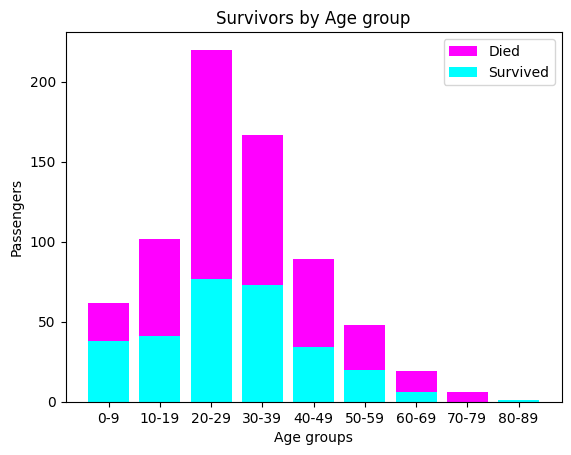

In [39]:
x = range(len(agesummary.index.values))
ht = agesummary.Total
hs = agesummary.Survived

pht = pl.bar(x, ht, color=['magenta'])
phs = pl.bar(x, hs, color=['cyan'])

pl.xticks(x, agesummary.index.values)
pl.xlabel('Age groups')
pl.ylabel('Passengers')
pl.title('Survivors by Age group')


pl.legend([pht,phs],['Died', 'Survived'])

In [40]:
agesummary['SurvivedPercent'] = round((agesummary.Survived / agesummary.Total) * 100,2)
agesummary['DiedPercent'] = round(((agesummary.Total - agesummary.Survived) / agesummary.Total) * 100,2)
agesummary

Survived  Total  SurvivedPercent  DiedPercent
AgeGroup                                               
0-9             38     62            61.29        38.71
10-19           41    102            40.20        59.80
20-29           77    220            35.00        65.00
30-39           73    167            43.71        56.29
40-49           34     89            38.20        61.80
50-59           20     48            41.67        58.33
60-69            6     19            31.58        68.42
70-79            0      6             0.00       100.00
80-89            1      1           100.00         0.00

From the above graph and percentages, shockingly we can see that most who died were from 20-29 age group, when this is the age group that can has the capability to save themselves.

Also, survival percentage of 0-9 age group is best - at 61.29% which means to say that children are more prioritized during rescue operations.